## Problema 1: Newton-Raphson en 2D para Polinomios Cúbicos

In [63]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos el x y la funcion 
x = sp.symbols('x')
funcion = 3*x**3 - 10*x**2 - 56*x + 50

# Calculamos la primera y segunda derivada
primera_derivada = sp.diff(funcion, x)
segunda_derivada = sp.diff(primera_derivada, x)

# Convertimos las funciones a funciones numpy para evaluarlas
funcion_np = sp.lambdify(x, funcion, 'numpy')
primera_derivada_np = sp.lambdify(x, primera_derivada, 'numpy')
segunda_derivada_np = sp.lambdify(x, segunda_derivada, 'numpy')

# Implementamos Newton-Raphson
def newton_raphson(primera_derivada, segunda_derivada, x_0, alpha , tol = 1e-7, max_iter = 100):
    x_k = x_0

    for k in range(max_iter):
        gradiente = primera_derivada(x_k)
        hessiana = segunda_derivada(x_k) 

        if abs(hessiana) < 1e-10:
            hessiana = 1e-10 if hessiana >= 0 else -1e-10

        x_k1 = x_k - alpha * (gradiente/hessiana)

        if abs(primera_derivada(x_k1)) < tol:
            return x_k1
        
        x_k = x_k1

    return x_k

# Determinamos los diferentes valores iniciales de x_0 y alpha
x_iniciales = [-6, -4, -2, 0, 2, 4, 6]
alphas = [0.2, 0.1]
resultados = []

for x_0 in x_iniciales:
    for alpha in alphas:
        solucion = newton_raphson(primera_derivada_np, segunda_derivada_np, x_0, alpha)

        valor_funcion = funcion_np(solucion)
        valor_segunda_derivada = segunda_derivada_np(solucion)

        if valor_segunda_derivada > 0:
            tipo = "Minimo local"
        elif valor_segunda_derivada < 0:
            tipo = "Maximo local"
        else:
            tipo = "Punto de inflexion"

        resultados.append((x_0, solucion, valor_funcion, tipo, alpha))
        print(f"x_0 = {x_0}, x* = {solucion:.6f}, f(x*) = {valor_funcion:.6f}, α = {alpha:.3f}, {tipo}")

x_0 = -6, x* = -1.619601, f(x*) = 101.721420, α = 0.200, Maximo local
x_0 = -6, x* = -1.619822, f(x*) = 101.721419, α = 0.100, Maximo local
x_0 = -4, x* = -1.619601, f(x*) = 101.721420, α = 0.200, Maximo local
x_0 = -4, x* = -1.619695, f(x*) = 101.721420, α = 0.100, Maximo local
x_0 = -2, x* = -1.619601, f(x*) = 101.721420, α = 0.200, Maximo local
x_0 = -2, x* = -1.619612, f(x*) = 101.721420, α = 0.100, Maximo local
x_0 = 0, x* = -1.619601, f(x*) = 101.721420, α = 0.200, Maximo local
x_0 = 0, x* = -1.619573, f(x*) = 101.721420, α = 0.100, Maximo local
x_0 = 2, x* = 3.841823, f(x*) = -142.626770, α = 0.200, Minimo local
x_0 = 2, x* = 3.841793, f(x*) = -142.626770, α = 0.100, Minimo local
x_0 = 4, x* = 3.841823, f(x*) = -142.626770, α = 0.200, Minimo local
x_0 = 4, x* = 3.841828, f(x*) = -142.626770, α = 0.100, Minimo local
x_0 = 6, x* = 3.841823, f(x*) = -142.626770, α = 0.200, Minimo local
x_0 = 6, x* = 3.841906, f(x*) = -142.626770, α = 0.100, Minimo local


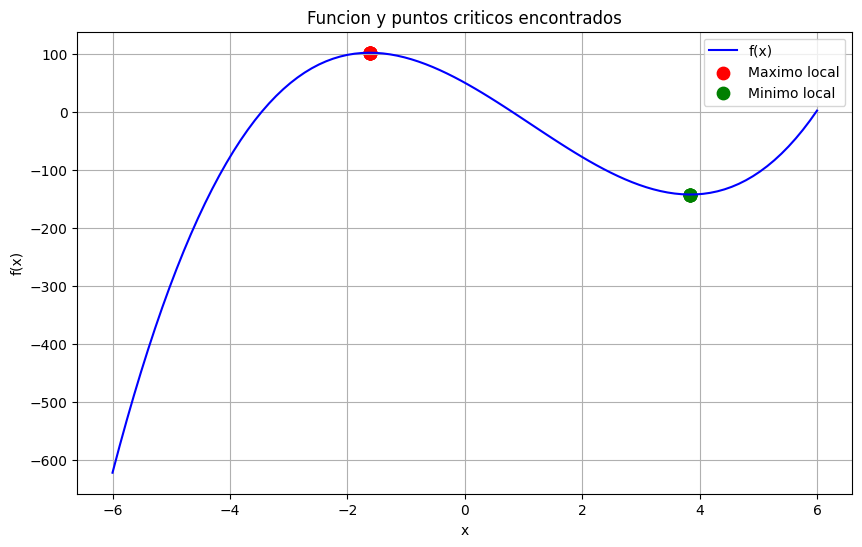

In [64]:
x_vals = np.linspace(-6, 6, 100)
y_vals = funcion_np(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)', color='blue')

for (x_0, x_sol, y_sol, tipo, alpha) in resultados:
    if tipo == "Minimo local":
        plt.scatter(x_sol, y_sol, color='green', s=80, label='Minimo local' if 'Minimo local' not in [r[3] for r in resultados[:resultados.index((x_0, x_sol, y_sol, tipo, alpha))]] else "")
    elif tipo == "Maximo local":
        plt.scatter(x_sol, y_sol, color='red', s=80, label='Maximo local' if 'Maximo local' not in [r[3] for r in resultados[:resultados.index((x_0, x_sol, y_sol, tipo, alpha))]] else "")

plt.title("Funcion y puntos criticos encontrados")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()

## Problema 2: Análisis de Extremos Locales y Globales

In [55]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Definimos el x y la funcion 
x = sp.symbols('x')
funcion = x**5 - 8*x**3 + 10*x + 6

# Calculamos la primera y segunda derivada
primera_derivada = sp.diff(funcion, x)
segunda_derivada = sp.diff(primera_derivada, x)

# Convertimos las funciones a funciones numpy para evaluarlas
funcion_np = sp.lambdify(x, funcion, 'numpy')
primera_derivada_np = sp.lambdify(x, primera_derivada, 'numpy')
segunda_derivada_np = sp.lambdify(x, segunda_derivada, 'numpy')

# Implementamos Newton-Raphson
def newton_raphson(primera_derivada, segunda_derivada, x_0, alpha , tol = 1e-7, max_iter = 100):
    x_k = x_0

    for k in range(max_iter):
        gradiente = primera_derivada(x_k)
        hessiana = segunda_derivada(x_k) 

        if abs(hessiana) < 1e-10:
            hessiana = 1e-10 if hessiana >= 0 else -1e-10

        x_k1 = x_k - alpha * (gradiente/hessiana)

        if abs(primera_derivada(x_k1)) < tol:
            return x_k1
        
        x_k = x_k1

    return x_k

# Determinamos los diferentes valores iniciales de x_0 y alpha
x_iniciales = [-3, -1, 1, 3]
alphas = [0.2, 0.1]
resultados = []

# Obtenemos los extremos
for x_0 in x_iniciales:
    for alpha in alphas:
        solucion = newton_raphson(primera_derivada_np, segunda_derivada_np, x_0, alpha)

        valor_funcion = funcion_np(solucion)
        valor_segunda_derivada = segunda_derivada_np(solucion)

        if valor_segunda_derivada > 0:
            tipo = "Minimo local"
        elif valor_segunda_derivada < 0:
            tipo = "Maximo local"
        else:
            tipo = "Punto de inflexion"

        resultados.append((x_0, round(solucion, 2), round(valor_funcion, 4), alpha, tipo))


# Eliminamos los duplicados
unicos = []
for r in resultados:
    if not any(abs(r[0] - p[0]) < 0.05 for p in unicos):
        unicos.append(r)

# Sacamos el maximo y el minimo global 
minimo_global = min(unicos, key=lambda r: r[1])
maximo_global = max(unicos, key=lambda r: r[1])
unicos = [r for r in unicos if r != minimo_global and r != maximo_global]

print("Puntos criticos unicos:")
for r in unicos:
    print(f"x_0 = {r[0]}, x* = {r[1]:.6f}, f(x*) = {r[2]:.6f}, α = {r[3]:.3f}, {r[4]}")

print("")
print("Minimo global:")
print(f"x_0 = {r[0]}, x = {minimo_global[1]:.6f}, f(x) = {minimo_global[2]:.6f}, α = {r[3]:.3f}")

print("")
print("Maximo global:")
print(f"x_0 = {r[0]}, x = {maximo_global[1]:.6f}, f(x) = {maximo_global[2]:.6f}, α = {r[3]:.3f}")


Puntos criticos unicos:
x_0 = -1, x* = -0.680000, f(x*) = 1.570000, α = 0.200, Minimo local
x_0 = 1, x* = 0.680000, f(x*) = 10.430000, α = 0.200, Maximo local

Minimo global:
x_0 = 1, x = -2.080000, f(x) = 18.258800, α = 0.200

Maximo global:
x_0 = 1, x = 2.080000, f(x) = -6.258800, α = 0.200


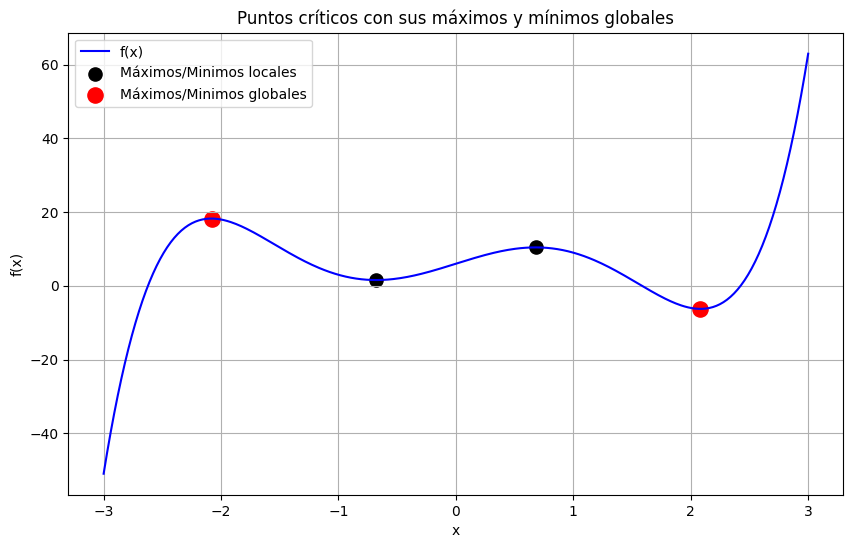

In [ ]:
x_vals = np.linspace(-3, 3, 400)
y_vals = funcion_np(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, color='blue', label='f(x)')

for (x_0, x_sol, y_sol, alpha, tipo) in unicos:
    plt.scatter(x_sol, y_sol, color='black', s=90)

plt.scatter(minimo_global[1], minimo_global[2], color='red', s=120)
plt.scatter(maximo_global[1], maximo_global[2], color='red', s=120)

plt.title("Puntos críticos con sus máximos y mínimos globales")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.scatter([], [], color='black', s=90, label='Maximos/Minimos locales')
plt.scatter([], [], color='red', s=120, label='Maximos/Minimos globales')
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Problema 3: Newton-Raphson Multidimensional

## Problema 4: Gradiente Descendente en Optimización

## Problema 5: Descenso de Gradiente y Descenso de Gradiente Basado en Momento